In [4]:
import numpy as np
import pandas as pd

In [5]:
import gensim
import os

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/0xr4plh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import json

story = []

json_file_path = 'data/Friends.json'

with open(json_file_path, 'r') as f:
    data = json.load(f) 
    for entry in data:
        text = entry.get("Text", "")  # Extract the "Text" field
        if text:  
            raw_sent = sent_tokenize(text)  # Tokenize into sentences
            for sent in raw_sent:
                story.append(simple_preprocess(sent))  # Preprocess each sentence



In [11]:
print(len(story) , story[:10])

123725 [['originally', 'written', 'by', 'marta', 'kauffman', 'and', 'david', 'crane'], ['transcribed', 'by', 'guineapig'], ['central', 'perk'], ['all', 'present', 'except', 'rachel', 'and', 'ross'], ['there', 'nothing', 'to', 'tell'], ['he', 'just', 'some', 'guy', 'work', 'with'], ['mon', 'you', 're', 'going', 'out', 'with', 'the', 'guy'], ['there', 'gotta', 'be', 'something', 'wrong', 'with', 'him'], ['so', 'does', 'he', 'have', 'hump'], ['hump', 'and', 'hairpiece']]


In [12]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    vector_size=300
)

In [13]:
model.build_vocab(story)

In [18]:
model.corpus_count

123725

In [20]:
len(model.wv.key_to_index)

10393

In [19]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs) # (The total words actually trained , Total words which could have been trained if no frequency threshold have been put on it)

(2704867, 3769845)

In [29]:
model.wv.most_similar('perk') 

[('central', 0.8543791174888611),
 ('eating', 0.8191832304000854),
 ('gang', 0.7985734343528748),
 ('enters', 0.7964291572570801),
 ('pacing', 0.7900152802467346),
 ('drinking', 0.7817159295082092),
 ('watching', 0.7812767028808594),
 ('minus', 0.765148401260376),
 ('breakfast', 0.7504460215568542),
 ('sitting', 0.748981773853302)]

In [30]:
model.wv.most_similar('ross')

[('joey', 0.9558791518211365),
 ('phoebe', 0.9234755039215088),
 ('rachel', 0.9152444005012512),
 ('monica', 0.9062530398368835),
 ('chandler', 0.894068717956543),
 ('everyone', 0.7593780755996704),
 ('kitchen', 0.7514920830726624),
 ('susan', 0.735038161277771),
 ('emily', 0.7229256629943848),
 ('gang', 0.722875714302063)]

In [31]:
model.wv.doesnt_match(['susan','joe','yes','apartment'])

'yes'

In [32]:
model.wv.similarity('joe','rachel')

0.18609013

In [33]:
model.wv.similarity('ross','rachel')

0.91524446

In [34]:
model.wv.similarity('mike','rachel')

0.7125926

In [37]:
# The above results show related association as per the Sitcom Friends , so we can consider the model for our task ahead , training is done so that our model could be used for the task

In [38]:
y = model.wv.index_to_key

In [41]:
for word, idx in list(model.wv.key_to_index.items())[:10]:
    print(f"Word: {word}, Index: {idx}")

Word: you, Index: 0
Word: the, Index: 1
Word: to, Index: 2
Word: and, Index: 3
Word: it, Index: 4
Word: that, Index: 5
Word: is, Index: 6
Word: what, Index: 7
Word: oh, Index: 8
Word: in, Index: 9


In [42]:

model_save_path = "word2vec_model.model"
# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}") # for saving in root directory

Model saved to word2vec_model.model


In [43]:
from gensim.models import Word2Vec

model = Word2Vec.load("word2vec_model.model")
print("Model loaded successfully") # loading the model from directory

Model loaded successfully


In [44]:
vocab_length = len(model.wv.key_to_index) 
print("Vocabulary Length:", vocab_length)

Vocabulary Length: 10393


In [45]:
vector_dim = model.vector_size
print("Vector Dimension:", vector_dim)

Vector Dimension: 300


In [46]:
vectors = model.wv.vectors  # Access word vectors
print("Shape of word vectors:", vectors.shape)

Shape of word vectors: (10393, 300)


In [120]:
top_words_per_feature = []

# To get the vectors from the saved model 
vectors = model.wv.vectors

for i in range(300):  # For each dimension iterating from 0 -> 299
    # Get the indices of the top 100 words for this feature i
    top_indices = np.argsort(vectors[:, i])[-10:][::-1]  # Sort and slice the last 100 elements in descending order , this gives the indices of 100 words that were most prominent or have highest value in the dimension i (currently)
    top_words = [model.wv.index_to_key[index] for index in top_indices]  # Convert indices to words , to get words from indices
    top_words_per_feature.append(top_words) # taking all those words for each dim from 0 -> 299 and stroing them into a list of obviosuly size (300,100) -> top thousand words for each 300 dimensions of embedding

print("Top words per feature computed successfully.")

# Among the top 100 words stored , they are further stored in sorted , that is the first word has the highest value and the 100th word having comparitevly the least value.

Top words per feature computed successfully.


In [121]:
print(len(top_words_per_feature) , len(top_words_per_feature[0]))

300 10


In [122]:
(top_words_per_feature[0]) # To see the first 20 words which are most similar to the first dimension that is index = 0.
# We see this these words have had the highest value for their first dimention
# An observation suggests that , in this 0th dimnesion out of 300 vector size , those words have highest value which are somewhat related to go , going and these kind of words , maybe this feature indicates - "What's the weightage of going/went/gone/go in this?"

['want',
 'going',
 'gonna',
 'let',
 'give',
 'would',
 'phone',
 'from',
 'love',
 'don']

In [123]:
(top_words_per_feature[1]) 

['his',
 'door',
 'he',
 'looks',
 'takes',
 'away',
 'turns',
 'hand',
 'grabs',
 'her']

In [124]:
feature_index = 0
words = top_words_per_feature[feature_index][:]
values = [vectors[model.wv.key_to_index[word]][feature_index] for word in words]
words_with_values = list(zip(words, values))

for word, value in words_with_values:
    print(f"Word: {word}, Value: {value}")
# To see what were the numerical values of these words in their 0th dimention , as we are checking for feature_index = 0.


Word: want, Value: 1.3406660556793213
Word: going, Value: 1.1639562845230103
Word: gonna, Value: 1.1368004083633423
Word: let, Value: 1.071673035621643
Word: give, Value: 1.0129382610321045
Word: would, Value: 1.0062319040298462
Word: phone, Value: 0.9636204838752747
Word: from, Value: 0.8388965129852295
Word: love, Value: 0.8304322957992554
Word: don, Value: 0.8277336955070496


In [125]:
embeddings_3d_list = []

for feature_words in top_words_per_feature:
    feature_embeddings = []  # List to hold the embeddings for the current feature
    for word in feature_words:
        # Access the embedding using model.wv
        word_embedding = model.wv[word]
        feature_embeddings.append(word_embedding)
    embeddings_3d_list.append(feature_embeddings)

print("3D embeddings list created successfully.")


3D embeddings list created successfully.


In [126]:
import pickle
file_path = 'embeddings_3d_list.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(embeddings_3d_list, file)

print(f"Embeddings saved to {file_path}.")

Embeddings saved to embeddings_3d_list.pkl.


In [127]:
print(len(embeddings_3d_list) , len(embeddings_3d_list[0]) , len(embeddings_3d_list[0][0]))

300 10 300


In [128]:
import numpy as np
import pickle
import os

# Path to your pickle file
file_path = 'embeddings_3d_list.pkl'

# Load the embeddings from the pickle file
with open(file_path, 'rb') as file:
    embeddings_3d_list = pickle.load(file)


embeddings_3d_array = np.array(embeddings_3d_list)


avg_embeddings = np.mean(embeddings_3d_array, axis=1)


avg_embeddings_list = avg_embeddings.tolist()

output_path = 'Embedding/avg_embeddings.pkl'

output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir) 

# Save the averaged embeddings
with open(output_path, 'wb') as file:
    pickle.dump(avg_embeddings_list, file)

print("Averaged embeddings saved successfully at:", output_path)


Averaged embeddings saved successfully at: Embedding/avg_embeddings.pkl


In [129]:
# Load the averaged embeddings from the saved file
with open('Embedding/avg_embeddings.pkl', 'rb') as file:
    avg_embeddings_list = pickle.load(file)

# Check the dimensions of the loaded embeddings
print(f"Dimensions of averaged embeddings: {len(avg_embeddings_list)} x {len(avg_embeddings_list[0])}")

# View the first 10 rows and their content
for i in range(10):
    print(f"Dimension {i}: {avg_embeddings_list[i]}")


Dimensions of averaged embeddings: 300 x 300
Dimension 0: [1.0192949771881104, -0.08037825673818588, 0.1501978039741516, -0.1306026428937912, 0.07186058908700943, 0.299446165561676, -0.08015452325344086, 0.7503759264945984, -0.3060453534126282, -0.053440939635038376, -0.0992858037352562, -0.1347537785768509, 0.1706734299659729, -0.1650562435388565, 0.09089001268148422, -0.10945329815149307, -0.39555221796035767, 0.2466287612915039, 0.1440982073545456, 0.08512240648269653, 0.344993531703949, 0.4328252375125885, -0.009060931392014027, -0.46204668283462524, -0.15229246020317078, 0.26690399646759033, -0.11151687800884247, -0.06476832181215286, -0.05228520557284355, 0.07796547561883926, 0.24685916304588318, 0.07798118889331818, 0.30383896827697754, -0.18267172574996948, 0.2650187909603119, 0.1484440118074417, 0.0242522731423378, 0.17394809424877167, -0.26364731788635254, -0.23695158958435059, 0.08493860065937042, 0.25446587800979614, -0.20885224640369415, -0.006593653466552496, -0.049656357

In [130]:
from tqdm import tqdm
with open('Embedding/avg_embeddings.pkl', 'rb') as file:
    avg_embeddings_list = pickle.load(file)


avg_embeddings_array = np.array(avg_embeddings_list)

most_similar_words_and_scores = []

print("Finding most similar words and scores...")
for row_vector in tqdm(avg_embeddings_array, desc="Processing rows", total=len(avg_embeddings_array)):
    try:
        most_similar_word, score = model.wv.similar_by_vector(row_vector, topn=1)[0]
        most_similar_words_and_scores.append((most_similar_word, score))
    except KeyError:
        print("Skipping a vector due to KeyError.")

print("\nMost similar words and scores for each vector:")
for i, (word, score) in enumerate(most_similar_words_and_scores):
    print(f"Feature {i}: {word} (Score: {score})")


output_path = 'Embedding/most_similar_words_and_scores.pkl'
print("\nSaving results...")
with open(output_path, 'wb') as file:
    pickle.dump(most_similar_words_and_scores, file)

print(f"Results saved to {output_path}.")

Finding most similar words and scores...


Processing rows: 100%|██████████| 300/300 [00:00<00:00, 1614.87it/s]


Most similar words and scores for each vector:
Feature 0: wanna (Score: 0.7947806119918823)
Feature 1: moves (Score: 0.8824242949485779)
Feature 2: make (Score: 0.8131840825080872)
Feature 3: think (Score: 0.835318922996521)
Feature 4: had (Score: 0.7953248023986816)
Feature 5: ll (Score: 0.8237617015838623)
Feature 6: drinking (Score: 0.8425868153572083)
Feature 7: have (Score: 0.8240889310836792)
Feature 8: your (Score: 0.7803700566291809)
Feature 9: move (Score: 0.8405284881591797)
Feature 10: patio (Score: 0.738639235496521)
Feature 11: realise (Score: 0.7006112933158875)
Feature 12: chair (Score: 0.9049737453460693)
Feature 13: quickly (Score: 0.8854720592498779)
Feature 14: bathroom (Score: 0.8081728219985962)
Feature 15: realise (Score: 0.7242475748062134)
Feature 16: get (Score: 0.8093838691711426)
Feature 17: always (Score: 0.7958923578262329)
Feature 18: girls (Score: 0.6999796628952026)
Feature 19: cause (Score: 0.8284200429916382)
Feature 20: seen (Score: 0.779484570026397

In [133]:
for i, (word, score) in enumerate(most_similar_words_and_scores):
    print(f" {word} -> {model.wv[word][i]} ")

 wanna -> 0.5893552899360657 
 moves -> 0.6417257785797119 
 make -> 1.0188368558883667 
 think -> 0.8626256585121155 
 had -> 0.4919664263725281 
 ll -> 0.7247359156608582 
 drinking -> 0.34255677461624146 
 have -> 2.124668836593628 
 your -> 1.3166691064834595 
 move -> 0.580651044845581 
 patio -> 0.024535244330763817 
 realise -> 0.1448868364095688 
 chair -> 0.6437956094741821 
 quickly -> 0.24312719702720642 
 bathroom -> 0.7353017330169678 
 realise -> 0.07141174376010895 
 get -> 0.96809983253479 
 always -> 0.4878518879413605 
 girls -> 0.21543915569782257 
 cause -> 0.8600841760635376 
 seen -> 0.7567035555839539 
 around -> 1.104416012763977 
 standing -> 0.7400897741317749 
 cut -> 0.5131411552429199 
 she -> 0.8824158906936646 
 get -> 0.912930965423584 
 erm -> 0.20848990976810455 
 you -> 1.6101807355880737 
 start -> 0.808631956577301 
 probably -> 0.5423237681388855 
 live -> 0.34703126549720764 
 straightener -> 0.02926221676170826 
 what -> 0.8397234678268433 
 had 

In [156]:
word_vectors = []
dominant_words = []

for word , score in most_similar_words_and_scores:
    word_vectors.append(model.wv[word])
    dominant_words.append(word)

In [157]:
word_vector_features_array = np.array(word_vectors)

In [158]:
dominant_words

['wanna',
 'moves',
 'make',
 'think',
 'had',
 'll',
 'drinking',
 'have',
 'your',
 'move',
 'patio',
 'realise',
 'chair',
 'quickly',
 'bathroom',
 'realise',
 'get',
 'always',
 'girls',
 'cause',
 'seen',
 'around',
 'standing',
 'cut',
 'she',
 'get',
 'erm',
 'you',
 'start',
 'probably',
 'live',
 'straightener',
 'what',
 'had',
 'never',
 'sah',
 'even',
 'you',
 'he',
 'aren',
 'into',
 'jumps',
 'lobby',
 'off',
 'never',
 'apartment',
 'used',
 'get',
 'waited',
 'happen',
 'back',
 'br',
 'standing',
 'today',
 'now',
 'wouldn',
 'into',
 'known',
 'tries',
 'ball',
 'apartment',
 'strokes',
 'then',
 'called',
 'back',
 'hug',
 'probably',
 'would',
 'she',
 'thought',
 'could',
 'runs',
 'could',
 'can',
 'listening',
 'kitchen',
 'one',
 'we',
 'will',
 'back',
 'other',
 'today',
 'off',
 'off',
 'were',
 'lobby',
 'could',
 'guy',
 'goes',
 'your',
 'sock',
 'in',
 'returns',
 'when',
 'because',
 'bonding',
 'had',
 'think',
 'eating',
 'her',
 'celebrities',
 'our

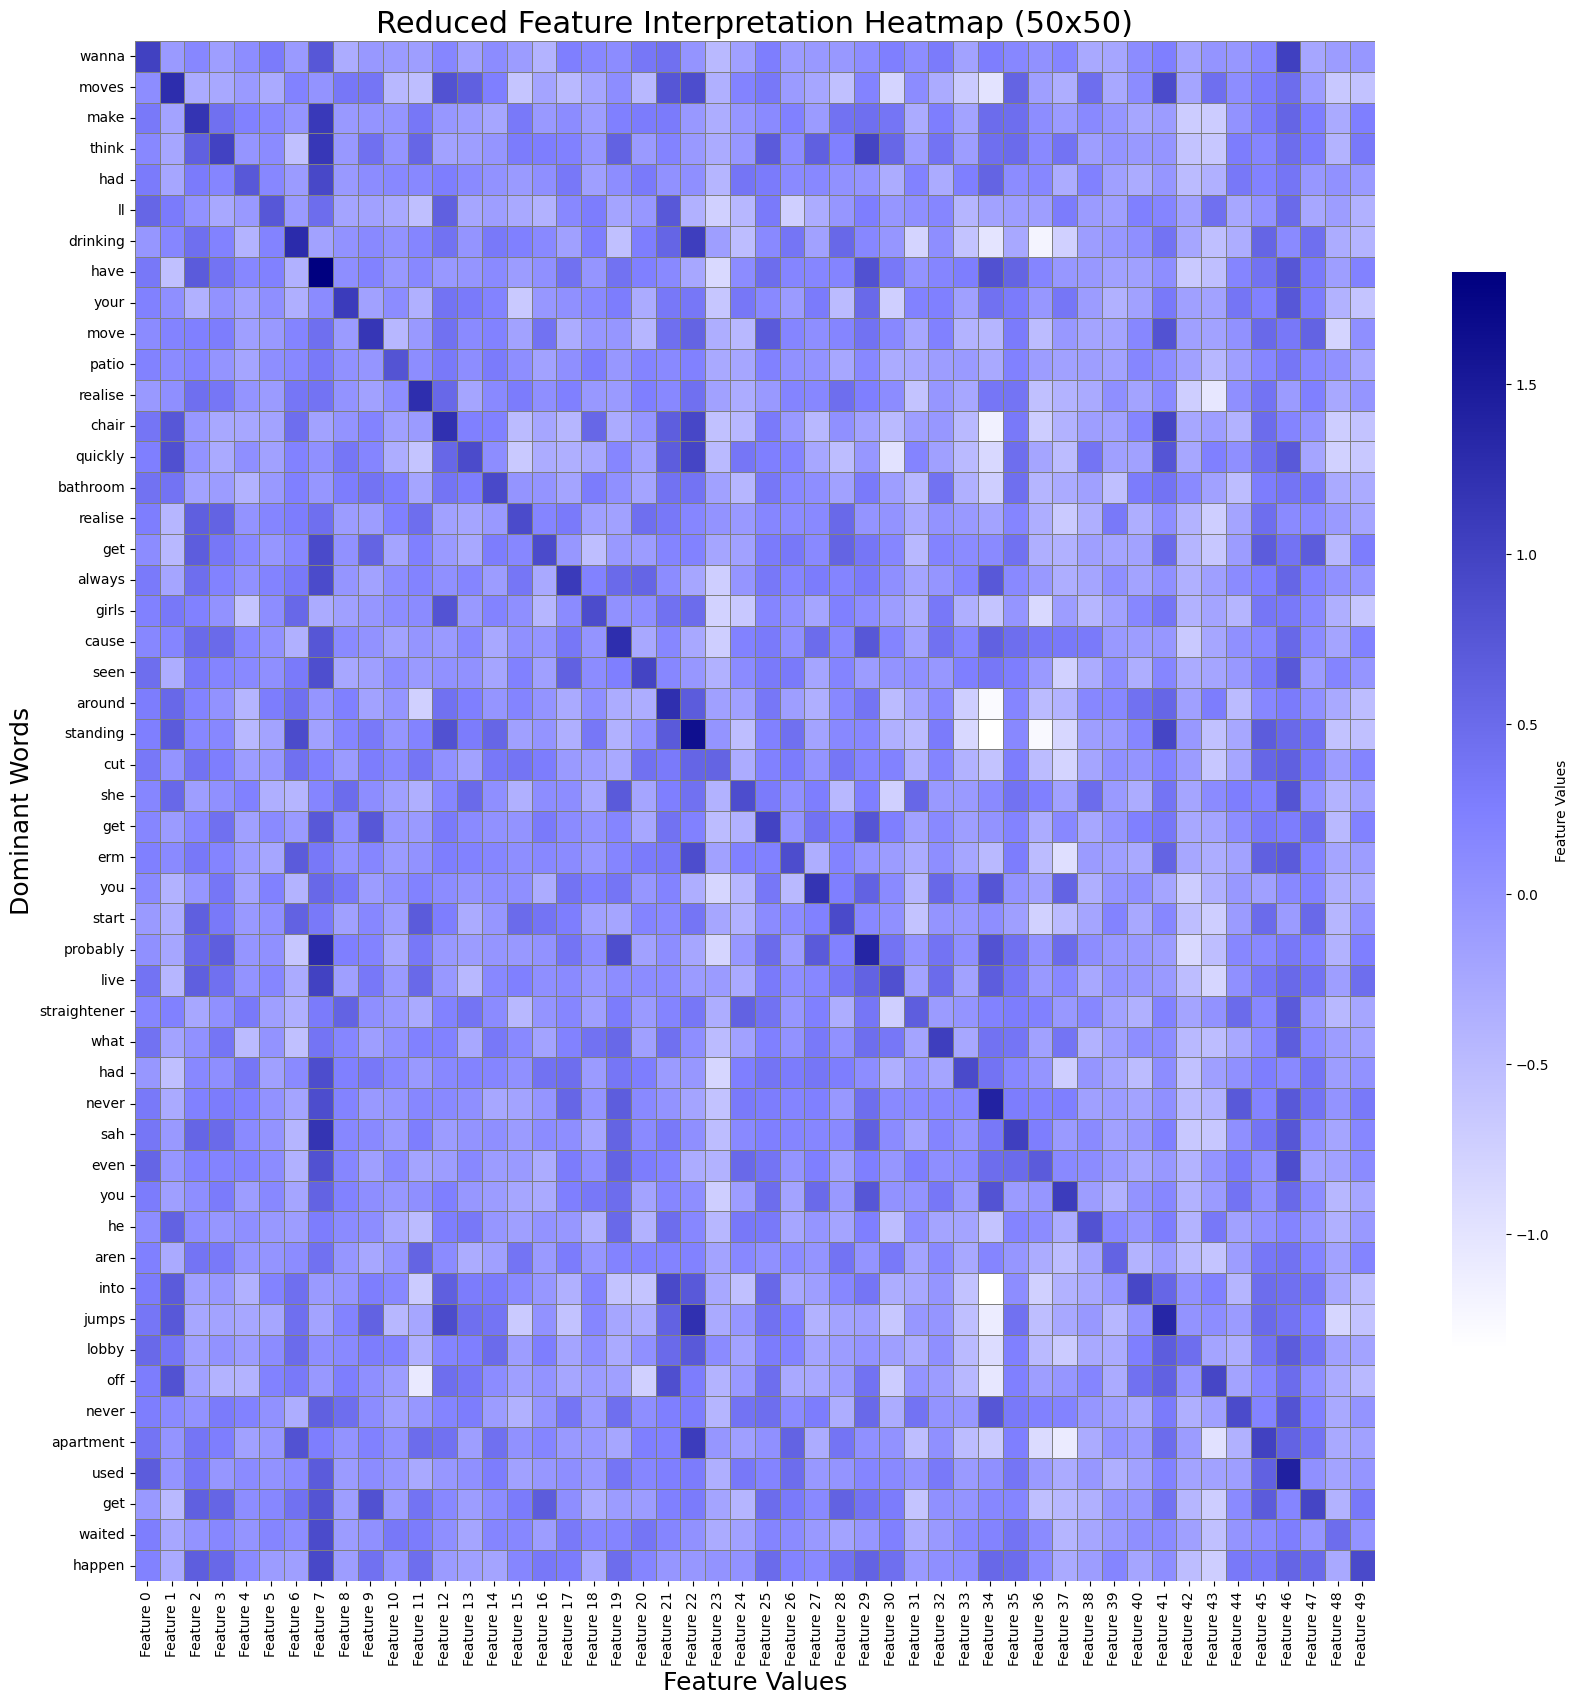

Heatmap saved as 'reduced_feature_interpretation_heatmap_custom.png'.


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap with lighter shades for values under 0.5
colors = [(1, 1, 1), (0.5, 0.5, 1), (0, 0, 0.5)]  # Light -> Medium -> Dark Blue
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Slice the array and row labels for 50 rows and 50 columns
reduced_array = avg_embeddings_array[:50, :50]  # First 50 rows and columns
reduced_dominant_words = dominant_words[:50]  # First 50 words for row labels

# Create the heatmap
plt.figure(figsize=(20, 20))  # Adjust figure size for clarity

sns.heatmap(
    reduced_array,
    cmap=custom_cmap,  # Use the custom colormap
    annot=False,  # Avoid cluttering with annotations
    xticklabels=[f"Feature {i}" for i in range(50)],  # Column labels for first 50 features
    yticklabels=reduced_dominant_words,  # Row labels for first 50 dominant words
    cbar_kws={"shrink": 0.7, "label": "Feature Values"},  # Color bar properties
    linewidths=0.5,  # Add grid lines
    linecolor='gray'  # Color of grid lines
)

# Set labels and title
plt.xlabel("Feature Values", fontsize=18)
plt.ylabel("Dominant Words", fontsize=18)
plt.title("Reduced Feature Interpretation Heatmap (50x50)", fontsize=22)

# Save the plot as an image
output_file = 'reduced_feature_interpretation_heatmap_custom.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # Save with high DPI for quality

plt.show()

print(f"Heatmap saved as '{output_file}'.")


In [151]:
for i in range(0,len(word_vector_features_array)):
    print(word_vector_features_array[i][i])

0.7275414601239198
0.5355397634102512
0.3936959032133154
0.0806429796944339
0.5273862526484728
0.04807778954444897
0.25382479224816934
0.31409865444947793
0.213833756912311
0.8056972255055088
0.30745125213445224
0.7668447670145918
0.7912000126470203
0.2512689005815253
0.8486760678616599
0.06932850876745988
0.28587090513062563
0.8259428970054259
0.5905511998996118
0.5787292524477067
0.4210356227353014
0.3127178875319214
0.3599538783491453
0.3870166039014854
0.6366613985604527
0.09431293552470743
0.13820494479858325
0.26018756086007544
0.8575290339726401
0.18077059699019837
0.7365181568997661
0.20064563029683402
0.30727368896337925
0.5743083874173243
0.751108797970831
0.8346860190566261
0.12910431253652477
0.08490857271565089
0.37154299664778245
0.8763921055011066
0.4752713066864619
0.6518912248491894
0.9827990166937633
0.4256691210818142
0.33265834740883105
0.9502194942023952
0.041874467350429545
0.8332050696428444
0.5636497210127117
0.09713777758399167
0.5578887474917722
0.806237472215

In [154]:
dominant_words[:50]

['Word_0',
 'Word_1',
 'Word_2',
 'Word_3',
 'Word_4',
 'Word_5',
 'Word_6',
 'Word_7',
 'Word_8',
 'Word_9',
 'Word_10',
 'Word_11',
 'Word_12',
 'Word_13',
 'Word_14',
 'Word_15',
 'Word_16',
 'Word_17',
 'Word_18',
 'Word_19',
 'Word_20',
 'Word_21',
 'Word_22',
 'Word_23',
 'Word_24',
 'Word_25',
 'Word_26',
 'Word_27',
 'Word_28',
 'Word_29',
 'Word_30',
 'Word_31',
 'Word_32',
 'Word_33',
 'Word_34',
 'Word_35',
 'Word_36',
 'Word_37',
 'Word_38',
 'Word_39',
 'Word_40',
 'Word_41',
 'Word_42',
 'Word_43',
 'Word_44',
 'Word_45',
 'Word_46',
 'Word_47',
 'Word_48',
 'Word_49']